#### Data and packages

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [137]:
train = pd.read_csv("C:\\Users\\Lilit\\Desktop\\train.csv")
test = pd.read_csv("C:\\Users\\Lilit\\Desktop\\test.csv")

In [138]:
train = train.drop(columns=["casual","registered" ])

In [139]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


## Exploratory Data Analysis

In [140]:
train.shape, test.shape

((10886, 10), (6493, 9))

In [141]:
tr = train.copy()
ts = test.copy()

#### NAs in data

In [142]:
print('Number of NAs in train table: ', train.isna().sum()[train.isna().sum()>0].count())
print('Number of NAs in test table: ', test.isna().sum()[test.isna().sum()>0].count())

Number of NAs in train table:  0
Number of NAs in test table:  0


#### Datetime variable

In [143]:
tr["datetime"] = pd.to_datetime(tr["datetime"], format='%Y/%m/%d %H:%M:%S')
ts["datetime"] = pd.to_datetime(ts["datetime"], format='%Y/%m/%d %H:%M:%S')

In [144]:
# create new variables from datetime
tr["hour"] = tr["datetime"].dt.hour
tr["month"] = tr["datetime"].dt.month_name()
tr["year"] = tr["datetime"].dt.year
tr["weekday"] = tr["datetime"].dt.day_name()

ts["hour"] = ts["datetime"].dt.hour
ts["month"] = ts["datetime"].dt.month_name()
ts["year"] = ts["datetime"].dt.year
ts["weekday"] = ts["datetime"].dt.day_name()


In [145]:
tr = tr.drop(columns="datetime")
ts = ts.drop(columns="datetime")

In [146]:
tr.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,year,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,0,January,2011,Saturday
1,1,0,0,1,9.02,13.635,80,0.0,40,1,January,2011,Saturday
2,1,0,0,1,9.02,13.635,80,0.0,32,2,January,2011,Saturday
3,1,0,0,1,9.84,14.395,75,0.0,13,3,January,2011,Saturday
4,1,0,0,1,9.84,14.395,75,0.0,1,4,January,2011,Saturday


#### Changing data types

In [147]:
ts.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
hour            int64
month          object
year            int64
weekday        object
dtype: object

In [148]:
# Change data type of some variables from integer to categorical.
def cats(data):
    cols = ["season", "holiday","workingday", "weather", "year"]
    for col in cols:
        data[col] = data[col].astype("O")
    return data

tr = cats(tr)
ts = cats(ts)

tr.season.dtype, ts.season.dtype

(dtype('O'), dtype('O'))

## Visualization

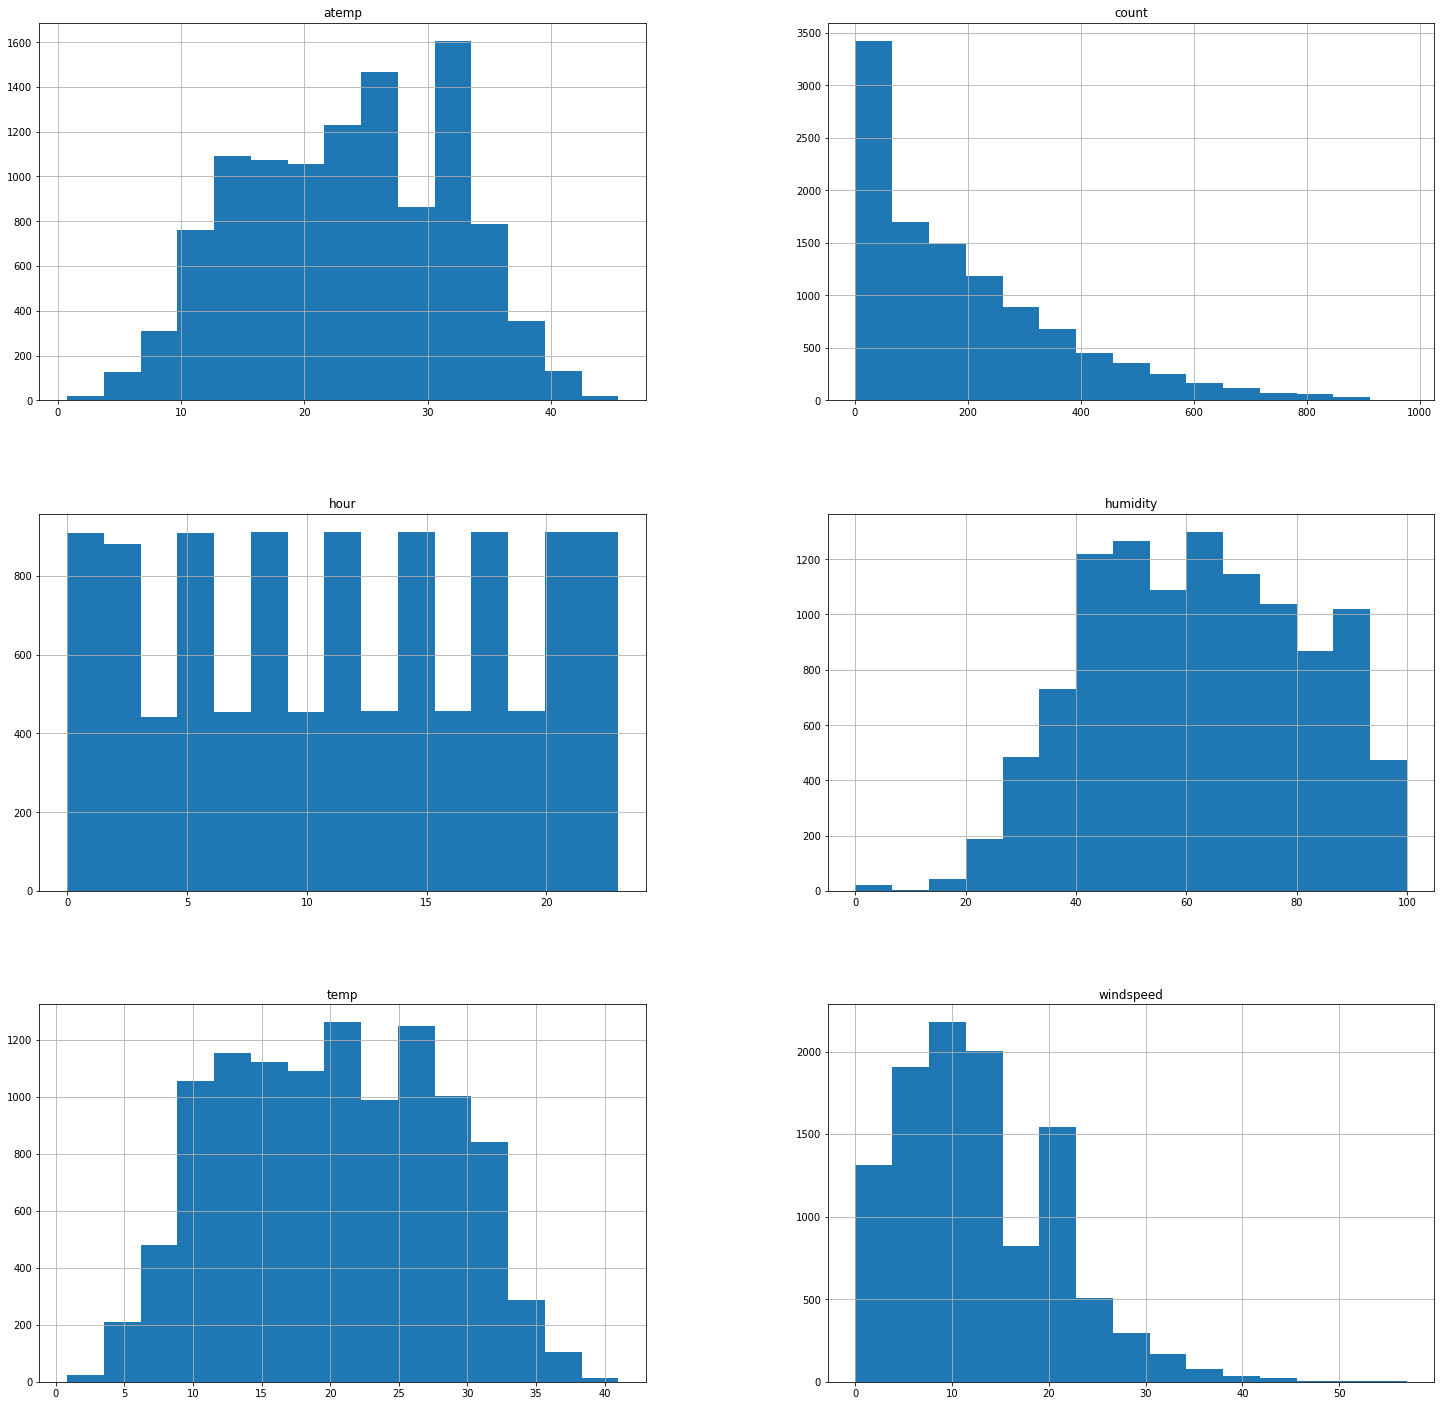

In [149]:
tr.hist(bins=15, figsize=(25,25))
plt.show()

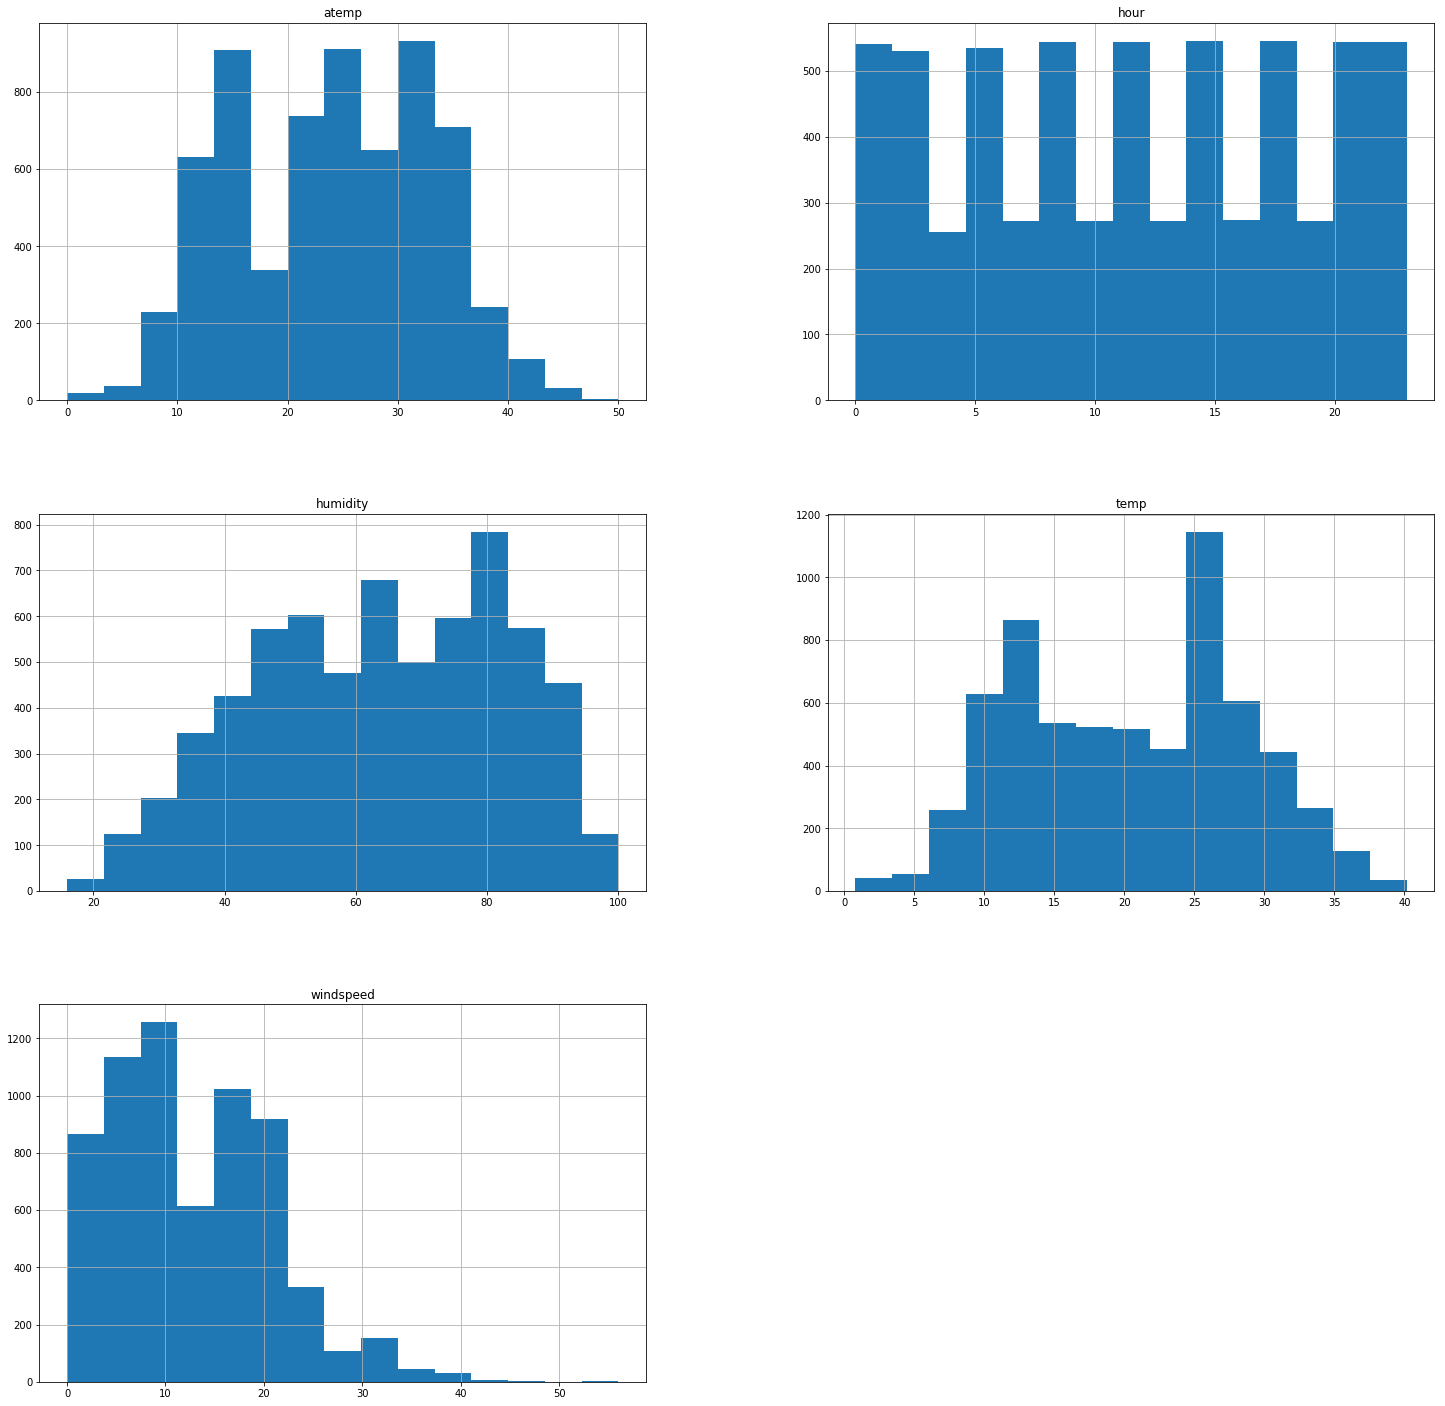

In [150]:
ts.hist(bins=15, figsize=(25,25))
plt.show()

In [151]:
tr.describe()

,temp,atemp,humidity,windspeed,count,hour
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132,11.541613
std,7.79159,8.474601,19.245033,8.164537,181.144454,6.915838
min,0.82000,0.760000,0.000000,0.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000,6.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000,12.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000,18.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000,23.000000


In [152]:
ts.describe()

,temp,atemp,humidity,windspeed,hour
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,20.620607,24.012865,64.125212,12.631157,11.555367
std,8.059583,8.782741,19.293391,8.250151,6.912526
min,0.820000,0.000000,16.000000,0.000000,0.000000
25%,13.940000,16.665000,49.000000,7.001500,6.000000
50%,21.320000,25.000000,65.000000,11.001400,12.000000
75%,27.060000,31.060000,81.000000,16.997900,18.000000
max,40.180000,50.000000,100.000000,55.998600,23.000000


In [153]:
# All variables in both test and train tables have identical distribution. 

### Visualizing distribution of each variable separately

#### Variable "count"


Text(0.5, 0, "Variable 'Count'")

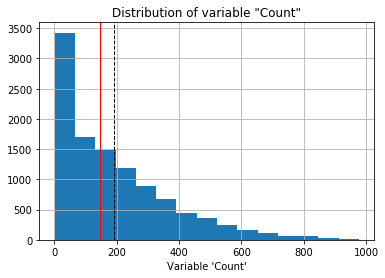

In [154]:
tr["count"].hist(bins=15)
plt.axvline(tr["count"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(tr["count"].median(), color='r', linewidth=1)
plt.title('Distribution of variable "Count"')
plt.xlabel("Variable 'Count'")

Text(0.5, 0, "Variable 'Count'")

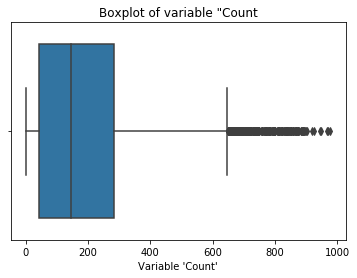

In [155]:
sns.boxplot(tr["count"])
plt.title('Boxplot of variable "Count')
plt.xlabel("Variable 'Count'")

Text(0.5, 0, "Variable 'Count'")

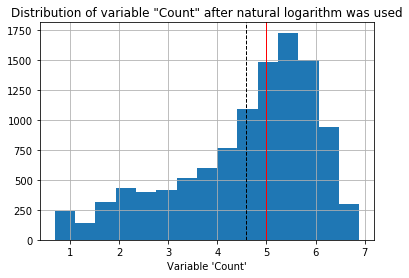

In [156]:
np.log1p(tr["count"]).hist(bins=15)
plt.axvline(np.log1p(tr["count"]).mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.log1p(tr["count"]).median(), color='r', linewidth=1)
plt.title('Distribution of variable "Count" after natural logarithm was used')
plt.xlabel("Variable 'Count'")

Text(0.5, 0, "Variable 'Temperature'")

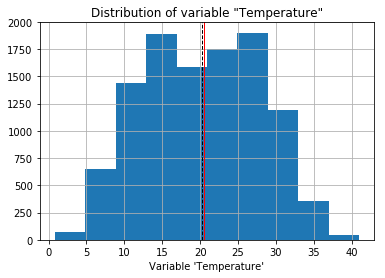

In [157]:
tr["temp"].hist(bins=10)
plt.axvline(tr["temp"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(tr["temp"].median(), color='r', linewidth=1)
plt.title('Distribution of variable "Temperature"')
plt.xlabel("Variable 'Temperature'")

Text(0.5, 0, 'Variable "feels like" temperature')

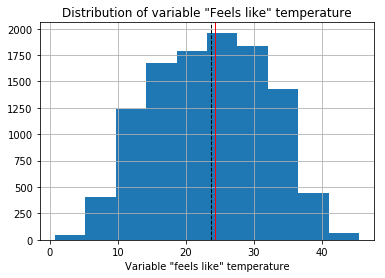

In [158]:
tr["atemp"].hist(bins=10)
plt.axvline(tr["atemp"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(tr["atemp"].median(), color='r', linewidth=1)
plt.title('Distribution of variable "Feels like" temperature')
plt.xlabel('Variable "feels like" temperature')

Text(0.5, 0, "Variable 'Relative humidity'")

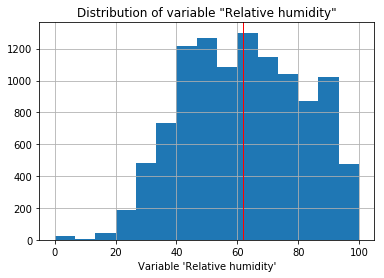

In [159]:
tr["humidity"].hist(bins=15)
plt.axvline(tr["humidity"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(tr["humidity"].median(), color='r', linewidth=1)
plt.title('Distribution of variable "Relative humidity"')
plt.xlabel("Variable 'Relative humidity'")

Text(0.5, 0, "Variable 'Wind speed'")

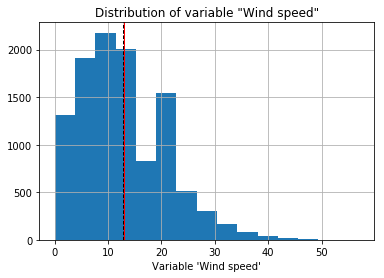

In [160]:
tr["windspeed"].hist(bins=15)
plt.axvline(tr["windspeed"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(tr["windspeed"].median(), color='r', linewidth=1)
plt.title('Distribution of variable "Wind speed"')
plt.xlabel("Variable 'Wind speed'")

Text(0.5, 0, "Variable 'Wind speed'")

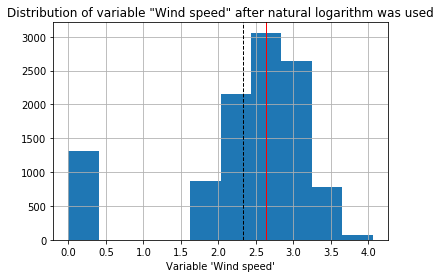

In [161]:
np.log1p(tr["windspeed"]).hist(bins=10)
plt.axvline(np.log1p(tr["windspeed"]).mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.log1p(tr["windspeed"]).median(), color='r', linewidth=1)
plt.title('Distribution of variable "Wind speed" after natural logarithm was used')
plt.xlabel("Variable 'Wind speed'")

In [162]:
#Natural logarithm of 'Count' and 'Wind speed' variables is more similar to normal distribution.
tr["count"] = np.log(tr["count"])
tr["windspeed"] = np.log1p(tr["windspeed"])

### Visualizing covariance

Text(0, 0.5, "Variable 'Count'")

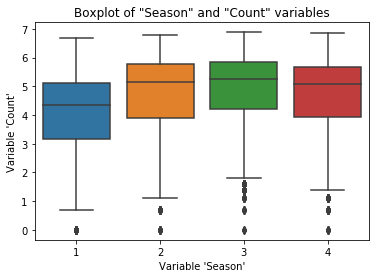

In [163]:
sns.boxplot( x=tr["season"], y = tr["count"] )
plt.title('Boxplot of "Season" and "Count" variables')
plt.xlabel("Variable 'Season'")
plt.ylabel("Variable 'Count'")

In [164]:
tr.groupby("season").agg({'count':'sum'})
# As we can see here are some differences of numbers of rented bikes depending on seasons 

,count
season,
1,10701.578276
2,12854.029037
3,13283.228921
4,12720.343849


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, "Variable 'Temperature'")

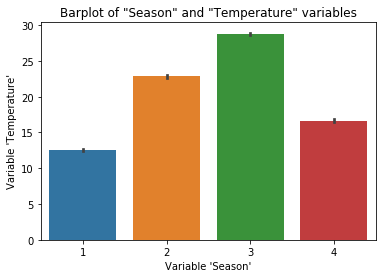

In [165]:
sns.barplot(train.season, tr["temp"])
plt.title('Barplot of "Season" and "Temperature" variables')
plt.xlabel("Variable 'Season'")
plt.ylabel("Variable 'Temperature'")

In [166]:
tr.groupby("season").agg({'temp':'median'})
# 'Season' and 'Temperature' variables are correlated too.

,temp
season,
1,12.30
2,22.96
3,28.70
4,16.40


Text(0, 0.5, "Variable 'Count'")

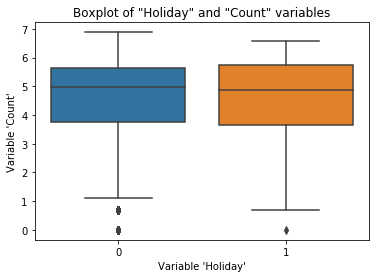

In [167]:
sns.boxplot( x=tr["holiday"], y = tr["count"] )
plt.title('Boxplot of "Holiday" and "Count" variables')
plt.xlabel("Variable 'Holiday'")
plt.ylabel("Variable 'Count'")
# Here we can't see much difference between this two variables.

Text(0, 0.5, "Variable 'Count'")

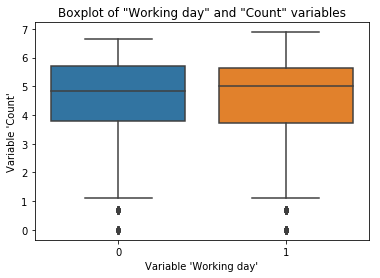

In [168]:
sns.boxplot( x=tr["workingday"], y = tr["count"] )
plt.title('Boxplot of "Working day" and "Count" variables')
plt.xlabel("Variable 'Working day'")
plt.ylabel("Variable 'Count'")
# Here we can't see much difference between this two variables.

Text(0, 0.5, "Variable 'Count'")

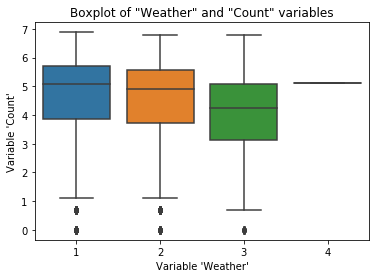

In [169]:
sns.boxplot( x=tr["weather"], y = tr["count"] )
plt.title('Boxplot of "Weather" and "Count" variables')
plt.xlabel("Variable 'Weather'")
plt.ylabel("Variable 'Count'")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, "Variable 'Temperature'")

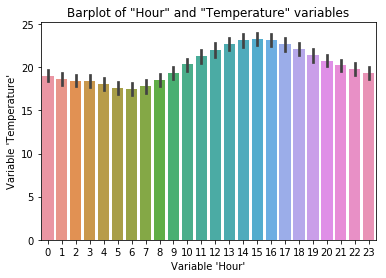

In [170]:
sns.barplot( x=tr["hour"], y = tr["temp"] )
plt.title('Barplot of "Hour" and "Temperature" variables')
plt.xlabel("Variable 'Hour'")
plt.ylabel("Variable 'Temperature'")

Text(0, 0.5, "Variable 'Count'")

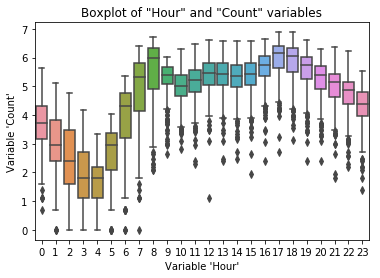

In [171]:
sns.boxplot( x=tr["hour"], y = tr["count"] )
plt.title('Boxplot of "Hour" and "Count" variables')
plt.xlabel("Variable 'Hour'")
plt.ylabel("Variable 'Count'")
# Here we can see some dependence between this two variables.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, "Variable 'Count'")

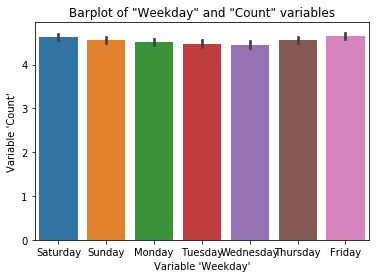

In [172]:
sns.barplot(x=tr["weekday"], y = tr["count"] )
plt.title('Barplot of "Weekday" and "Count" variables')
plt.xlabel("Variable 'Weekday'")
plt.ylabel("Variable 'Count'")

Text(0, 0.5, "Variable 'Count'")

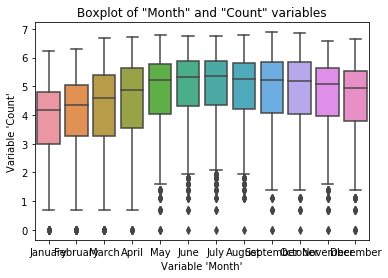

In [173]:
sns.boxplot(x=tr["month"], y = tr["count"] )
plt.title('Boxplot of "Month" and "Count" variables')
plt.xlabel("Variable 'Month'")
plt.ylabel("Variable 'Count'")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, "Variable 'Count'")

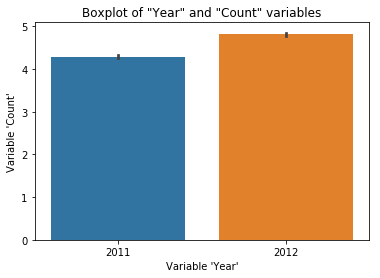

In [174]:
sns.barplot(x=tr["year"], y = tr["count"] )
plt.title('Boxplot of "Year" and "Count" variables')
plt.xlabel("Variable 'Year'")
plt.ylabel("Variable 'Count'")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

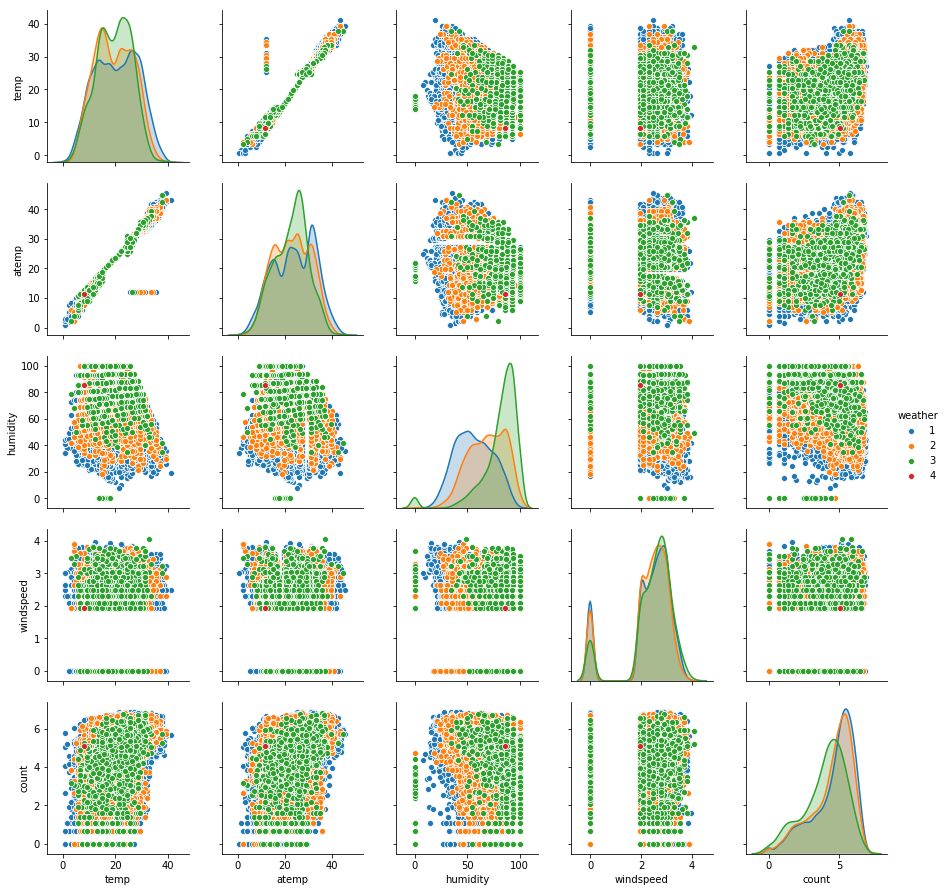

In [175]:
sns.pairplot(tr, vars = ["temp", "atemp", "humidity","windspeed", "count" ], hue="weather")

## Correlation

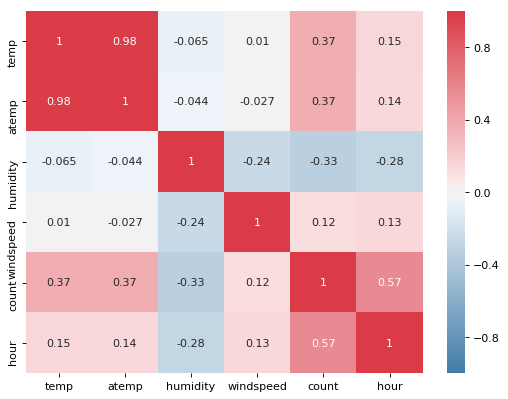

In [176]:
cr = tr.corr()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(cr, vmin=-1, vmax=1, center=0, annot=cr, cmap=sns.diverging_palette(240,10,as_cmap=True))

In [177]:
# As we can see in correlation matrix Temperature and 'Feels like' Temperature are highly correlated 
# and we don't need them both.
tr = tr.drop(columns="atemp")
ts = ts.drop(columns="atemp")

## Create dummies

In [178]:
tr = pd.get_dummies(tr)
ts = pd.get_dummies(ts)

In [179]:
tr.head()

,temp,humidity,windspeed,count,hour,season_1,season_2,season_3,season_4,holiday_0,...,month_September,year_2011,year_2012,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,9.84,81,0.0,2.772589,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,9.02,80,0.0,3.688879,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,9.02,80,0.0,3.465736,2,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,9.84,75,0.0,2.564949,3,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,9.84,75,0.0,0.000000,4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [180]:
tr.head()

,temp,humidity,windspeed,count,hour,season_1,season_2,season_3,season_4,holiday_0,...,month_September,year_2011,year_2012,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,9.84,81,0.0,2.772589,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,9.02,80,0.0,3.688879,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,9.02,80,0.0,3.465736,2,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,9.84,75,0.0,2.564949,3,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,9.84,75,0.0,0.000000,4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [181]:
tr.shape

(10886, 38)

# Models

In [182]:
y = tr["count"]
data = tr.drop(columns=["count"])

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [184]:
X_train.shape, X_test.shape

((7293, 37), (3593, 37))

## RMSLE

In [186]:
# Defining loss function
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## Ridge Regression

In [188]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

reg = Ridge()
parameters = {'alpha':[0.1, 1, 10, 50,100]}
reg1 = GridSearchCV(reg, parameters, cv=5)
res = reg1.fit(X_train, y_train)
print(res)

pred1 = reg1.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred1))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 1, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 RMSLE:  1.0073432898205588


## LASSO

In [189]:
from sklearn import linear_model

reg2 = linear_model.Lasso()
parameters = {'alpha':[0.1, 1, 10, 50,100]}
reg2 = GridSearchCV(reg2, parameters, cv=5)
res = reg2.fit(X_train, y_train)
print(res)

pred2 = reg2.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred2))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 1, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 RMSLE:  1.0526872407837822


## LARS Lasso

In [190]:
from sklearn import linear_model
reg3 = linear_model.LassoLars()
parameters = {'alpha':[0.1, 1, 10, 50,100]}
reg3 = GridSearchCV(reg3, parameters, cv=5)
res = reg3.fit(X_train, y_train)
print(res)

pred3 = reg3.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred3))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 1, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 RMSLE:  1.4151323851805542


## SVR

In [191]:
from sklearn import svm
reg4 = svm.SVR()

res = reg4.fit(X_train, y_train)
print(res)

pred4 = reg4.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred4))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

 RMSLE:  0.5170435544636535


## Decision Tree

In [192]:
from sklearn import tree
reg5 = tree.DecisionTreeRegressor()
parameters = {'max_depth': np.arange(3, 10), 'max_features' : [3, 5, 10, 15,20, 25,30, 35]}
reg5 = GridSearchCV(reg5, parameters, cv=5)
res = reg5.fit(X_train, y_train)
print(res)

pred5 = reg5.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred5))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'max_features': [3, 5, 10, 15, 20, 25, 30, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 RMSLE:  0.45983329108460025


## Gradient Boosting Regressor

In [193]:
from sklearn.ensemble import GradientBoostingRegressor

reg6 = GradientBoostingRegressor(n_estimators = 100,learning_rate= 0.1, max_depth= 10 )

res = reg6.fit(X_train, y_train)
print(res)

pred6 = reg6.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred6))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

 RMSLE:  0.3104028468095086


In [194]:
reg6 = GradientBoostingRegressor(n_estimators = 200,learning_rate= 0.1, max_depth= 100 )

res = reg6.fit(X_train, y_train)
print(res)

pred6 = reg6.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred6))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=100,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

 RMSLE:  0.41368255769232276


## Random Forest Regressor

In [195]:
from sklearn.ensemble import RandomForestRegressor

reg7 = RandomForestRegressor(n_estimators = 200, max_depth=50 )
res = reg7.fit(X_train, y_train)
print(res)

pred7 = reg7.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred7))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

 RMSLE:  0.3092880044500886


In [196]:
reg7 = RandomForestRegressor(n_estimators = 800, max_depth=100 )
res = reg7.fit(X_train, y_train)
print(res)

pred7 = reg7.predict(X_test) 
print("\n", "RMSLE: ", rmsle(y_test, pred7))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

 RMSLE:  0.3085785460875932


#### As we can see, we can get the lowest RMSLE with Random Forest Regressor.